In [1]:
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import gensim.downloader as api
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
data = fetch_20newsgroups(subset='all', categories=None, shuffle=True, random_state=42)


text_data = data.data[0]

# Word2Vec modelini yükleme
word2vec_model = api.load("word2vec-google-news-300")

# GloVe modelini yükleme
glove_model = api.load("glove-wiki-gigaword-300")

# FastText modelini yükleme
fasttext_model = api.load("fasttext-wiki-news-subwords-300")




In [3]:
# Benzerlik analizi
def similarity_analysis(model, word1, word2):
    similarity = model.similarity(word1, word2)
    return similarity


# Kümeleme analizi
def clustering_analysis(model, num_clusters=5):
    word_vectors = model.vectors
    kmeans = KMeans(n_clusters=num_clusters, n_init=7)
    kmeans.fit(word_vectors)
    clustered_words = {}
    for i in range(num_clusters):
        words = []
        for idx, label in enumerate(kmeans.labels_):
            if label == i:
                words.append(model.index_to_key[idx])
        clustered_words[f"Cluster {i+1}"] = words
    return clustered_words


# Analogi analizi
def analogy_analysis(model, word1, word2, word3):
    analogy = model.most_similar(positive=[word2, word3], negative=[word1])
    return analogy

# Eş anlamlı ve zıt anlamlı kelimelerin keşfi
def similar_opposite_words(model, word, num_similar=5, num_opposite=5):
    similar_words = model.similar_by_word(word, topn=num_similar)
    opposite_words = model.most_similar(negative=[word], topn=num_opposite)
    return similar_words, opposite_words

# Topluluk algılama analizi
def community_detection_analysis(model):
    #  PCA algoritması kullanıldı
    pca = PCA(n_components=2)
    word_vectors_2d = pca.fit_transform(model.vectors)
    return word_vectors_2d

# Sözcük bulutları oluşturma analizi
def wordcloud_analysis(model, word_list):
    word_freq = {word: model.key_to_index[word] for word in word_list}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Metin sınıflandırma analizi
def text_classification_analysis(data):
    X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)
    model = make_pipeline(TfidfVectorizer(), MultinomialNB())
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))


Benzerlik Analizi:
Word2Vec: 0.6510957
GloVe: 0.6336469
FastText: 0.7704246

Analogi Analizi:
Word2Vec: [('woman', 0.7609435319900513), ('girl', 0.6139994263648987), ('teenage_girl', 0.6040961742401123), ('teenager', 0.5825759172439575), ('lady', 0.5752554535865784), ('boy', 0.5077577233314514), ('policewoman', 0.5066847801208496), ('schoolgirl', 0.5052095651626587), ('blonde', 0.48696190118789673), ('person', 0.48637545108795166)]
GloVe: [('woman', 0.6957680583000183), ('girl', 0.5603842735290527), ('person', 0.5134302973747253), ('she', 0.4802548587322235), ('mother', 0.4633125066757202), ('boy', 0.46078377962112427), ('lady', 0.4552292823791504), ('teenager', 0.45107489824295044), ('her', 0.4438043236732483), ('men', 0.4426511228084564)]
FastText: [('woman', 0.7853856086730957), ('lady', 0.6799712777137756), ('strongwoman', 0.6554559469223022), ('trans-woman', 0.6460123658180237), ('girl', 0.6440247297286987), ('ladykiller', 0.623690664768219), ('man--and', 0.6229948997497559), ('fe

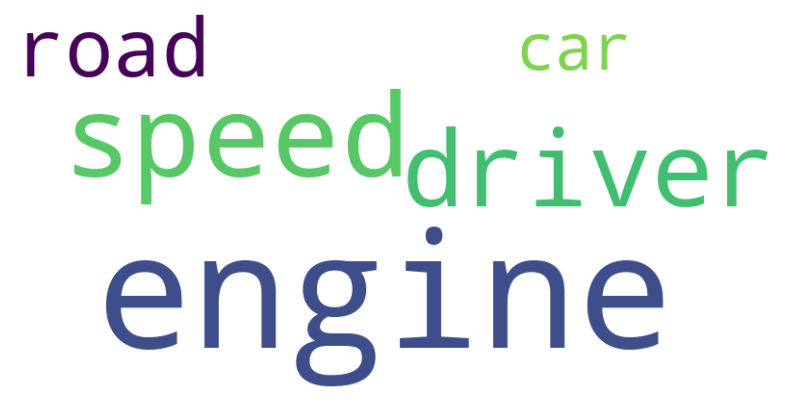

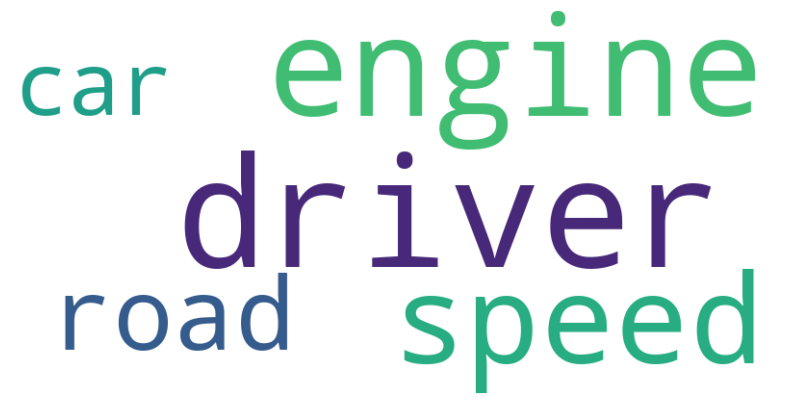

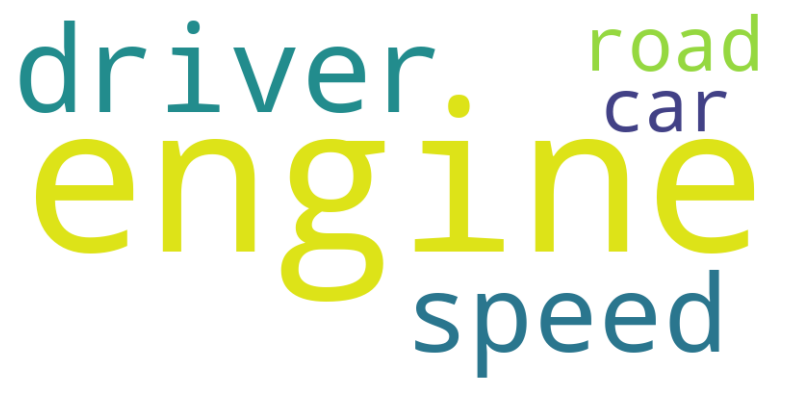


Metin Sınıflandırma Analizi:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       151
           1       0.88      0.80      0.84       202
           2       0.89      0.81      0.85       195
           3       0.63      0.86      0.72       183
           4       0.96      0.83      0.89       205
           5       0.96      0.82      0.89       215
           6       0.96      0.62      0.75       193
           7       0.88      0.93      0.90       196
           8       0.89      0.95      0.92       168
           9       0.96      0.95      0.95       211
          10       0.91      0.98      0.94       198
          11       0.80      0.97      0.88       201
          12       0.92      0.80      0.85       202
          13       0.97      0.90      0.93       194
          14       0.89      0.99      0.94       189
          15       0.53      0.99      0.69       202
          16       0.79      0.96      0.87       1

In [4]:
word1 = "king"
word2 = "queen"
word3 = "man"
print("Benzerlik Analizi:")
print("Word2Vec:", similarity_analysis(word2vec_model, word1, word2))
print("GloVe:", similarity_analysis(glove_model, word1, word2))
print("FastText:", similarity_analysis(fasttext_model, word1, word2))


print("\nAnalogi Analizi:")
print("Word2Vec:", analogy_analysis(word2vec_model, word1, word2, word3))
print("GloVe:", analogy_analysis(glove_model, word1, word2, word3))
print("FastText:", analogy_analysis(fasttext_model, word1, word2, word3))

print("\nEş Anlamlı ve Zıt Anlamlı Kelimelerin Keşfi:")
print("Word2Vec:", similar_opposite_words(word2vec_model, word1))
print("GloVe:", similar_opposite_words(glove_model, word1))
print("FastText:", similar_opposite_words(fasttext_model, word1))


print("\nSözcük Bulutları Oluşturma Analizi:")
word_list = ["car", "engine", "speed", "driver", "road"]
wordcloud_analysis(word2vec_model, word_list)
wordcloud_analysis(fasttext_model, word_list)
wordcloud_analysis(glove_model, word_list)


print("\nMetin Sınıflandırma Analizi:")
text_classification_analysis(data)

print("\nTopluluk Algılama Analizi:")
print("Word2Vec:", community_detection_analysis(word2vec_model))
print("GloVe:", community_detection_analysis(glove_model))
print("FastText:", community_detection_analysis(fasttext_model))
